Importación de librerías:

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


•	Importación del set de datos de moda de MNIST:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Exploración del dataset:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

Escalamiento de valores:

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Construcción de la red neuronal:

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compilación del modelo:

In [15]:
model.compile(optimizer='ftrl',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenamiento del modelo:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2222 - accuracy: 0.1592
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6438 - accuracy: 0.4006
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3047 - accuracy: 0.5470
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1218 - accuracy: 0.6042
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0025 - accuracy: 0.6389
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9255 - accuracy: 0.6558
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8736 - accuracy: 0.6689
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8358 - accuracy: 0.6836
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8062 - accuracy: 0.6973
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.781

Obtención de la precisión:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.7869 - accuracy: 0.7059

Test accuracy: 0.7059000134468079


Predicciones:

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([9.4343113e-07, 1.5545814e-08, 7.1615199e-05, 5.8060508e-05,
       3.5888658e-04, 2.7508265e-01, 1.2384611e-04, 2.4352293e-01,
       2.4795793e-02, 4.5598519e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

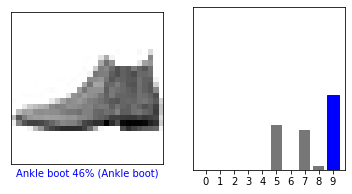

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

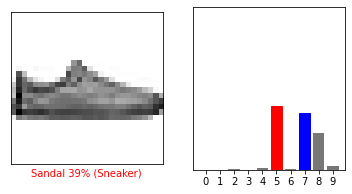

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()